# Importing Required Libraries for data loading and processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import os
import cv2
import pathlib
import tensorflow
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image_dataset_from_directory

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Setting Properties of Image

In [2]:
# Width and height of image
img_width=100
img_height=100
img_size=(img_width,img_height)
img_channels=3

In [3]:
#Uploding the path of dataset
data_dir=pathlib.Path('/kaggle/input/plantvillage-dataset/color')


## Splitting color dataset of palntvillage into Train, Val, & Test data and Loading it

In [4]:
# Uploading test dataset
train_gen = image_dataset_from_directory(data_dir, 
                                        seed = 123, 
                                        image_size=(img_height, img_width), 
                                        validation_split=0.2, 
                                        subset='training')

Found 54305 files belonging to 38 classes.
Using 43444 files for training.


In [5]:
# Uploading validate data
val_gen = image_dataset_from_directory(data_dir, 
                                      seed = 123, 
                                      image_size=(img_height, img_width), 
                                      validation_split=0.2, 
                                      subset='validation')

Found 54305 files belonging to 38 classes.
Using 10861 files for validation.


In [6]:
# Uploading test data
test_gen = image_dataset_from_directory(data_dir, 
                                      seed = 123, 
                                      image_size=(img_height, img_width), 
                                      validation_split=None)

Found 54305 files belonging to 38 classes.


## Importing Libraries for performing CNN algorithm

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

## Creating CNN model

In [26]:
num_classes = 38

model = Sequential()

# Block 1
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model.add(Conv2D(16, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())

# Block 2
model.add(Conv2D(32, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())

# Block 3
model.add(Conv2D(64, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.15))

# Hidden Layer
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(num_classes))

In [27]:
# Compile the model 
model.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 100, 100, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 100, 100, 16)      448       
                                                                 
 activation_12 (Activation)  (None, 100, 100, 16)      0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 50, 50, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 50, 50, 32)        4640      
                                                                 
 activation_13 (Activation)  (None, 50, 50, 32)        0         
                                                      

## Fitting Train dataset into trained model

In [29]:
epochs = 10

history = model.fit(
  train_gen,
  validation_data=val_gen,
  epochs=epochs
)

Epoch 1/10


2023-05-16 03:51:27.745206: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_5/dropout_16/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1358/1358 [==============================] - 67s 48ms/step - loss: 1.0189 - accuracy: 0.7055 - val_loss: 0.5086 - val_accuracy: 0.8428
Epoch 2/10
1358/1358 [==============================] - 62s 46ms/step - loss: 0.3712 - accuracy: 0.8834 - val_loss: 0.3266 - val_accuracy: 0.8956
Epoch 3/10
1358/1358 [==============================] - 63s 46ms/step - loss: 0.2387 - accuracy: 0.9234 - val_loss: 0.2485 - val_accuracy: 0.9228
Epoch 4/10
1358/1358 [==============================] - 63s 46ms/step - loss: 0.1681 - accuracy: 0.9434 - val_loss: 0.3175 - val_accuracy: 0.9037
Epoch 5/10
1358/1358 [==============================] - 62s 45ms/step - loss: 0.1240 - accuracy: 0.9590 - val_loss: 0.2857 - val_accuracy: 0.9154
Epoch 6/10
1358/1358 [==============================] - 62s 46ms/step - loss: 0.1018 - accuracy: 0.9653 - val_loss: 0.2848 - val_accuracy: 0.9205
Epoch 7/10
1358/1358 [==============================] - 63s 46ms/step - loss: 0.0903 - accuracy: 0.9696 - val_loss: 0.3183 - val_accura

## Printing Accuracy of Model on Validation Dataset

In [30]:
# Evaluate the model
val_loss, val_acc = model.evaluate(val_gen)

# Print the accuracy
print("Val accuracy:", val_acc)
print("Val loss:", val_loss)

340/340 [==============================] - 13s 38ms/step - loss: 0.3134 - accuracy: 0.9252
Val accuracy: 0.9252370595932007
Val loss: 0.31337854266166687


## Predicting Disease

1/1 [==============================] - 0s 22ms/step


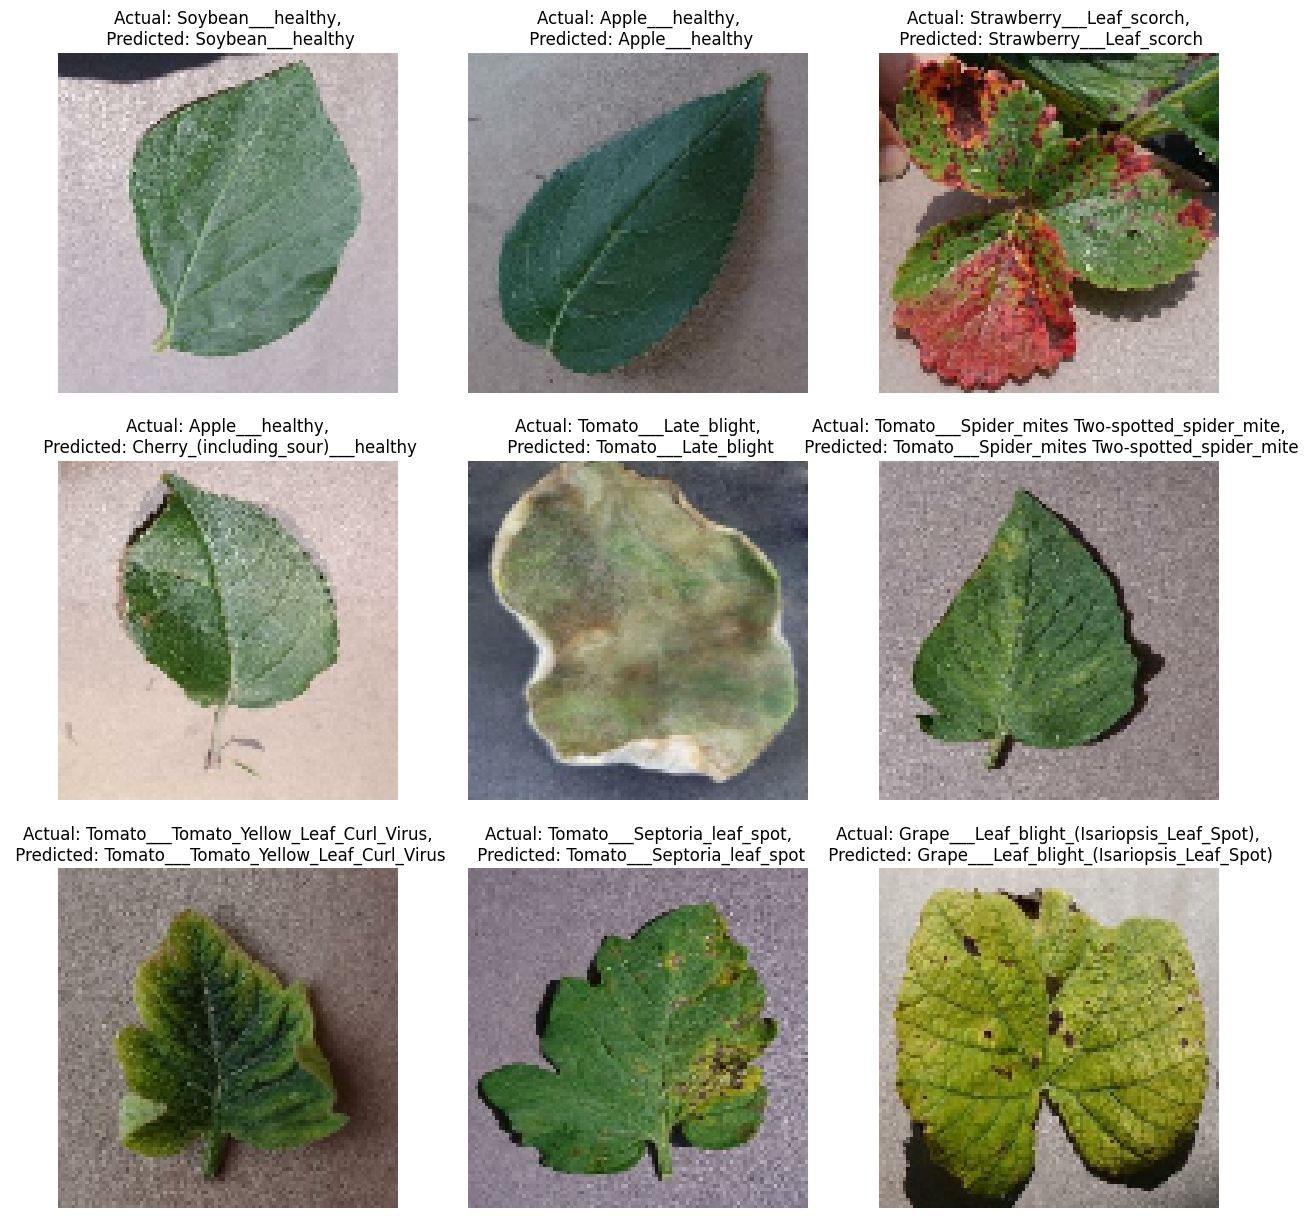

In [39]:
labels = train_gen.class_names
labels
for images_batch, labels_batch in test_gen.take(1):
    
    image = images_batch[0].numpy().astype('uint8')
    label = labels_batch[0].numpy()
    
    batch_prediction = model.predict(images_batch)

from tensorflow import expand_dims, newaxis

def predict(model, img):
    
    img_array = img.numpy()
    img_array = expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = labels[np.argmax(predictions[0])]
    confidence = round( (np.max(predictions[0])), 2)
    
    return predicted_class

plt.figure(figsize=(15, 15))

for images, lbs in val_gen.take(1):
    for i in range(9):
        
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint32"))
        
        predicted_class = predict(model, images[i])
        actual_class = labels[lbs[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}")
        
        plt.axis("off")